# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a list to store the json response for each city
responses = []

# Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

city_count = 0
for city in cities:
    url = base_url + f"{city}&units=metric&appid={weather_api_key}"
    city_data = requests.get(url).json()
    if city_data['cod'] == '404':
        print('City not found. Skipping...')
    else:
        responses.append(city_data)
        city_count += 1
        print(f"Processing record {city_count} | {city_data['name']}")

Processing record 1 | Yellowknife
Processing record 2 | Atuona
Processing record 3 | Mataura
Processing record 4 | Narsaq
Processing record 5 | Bathsheba
City not found. Skipping...
Processing record 6 | Maragogi
Processing record 7 | Okha
Processing record 8 | Paragominas
Processing record 9 | Hithadhoo
Processing record 10 | Alice Springs
Processing record 11 | Vaini
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing record 12 | Rzhaksa
Processing record 13 | Vardø
Processing record 14 | Necochea
Processing record 15 | Busselton
Processing record 16 | Bassano del Grappa
Processing record 17 | Ushuaia
Processing record 18 | Chifeng
Processing record 19 | Umluj
Processing record 20 | Bethel
City not found. Skipping...
Processing record 21 | Tuktoyaktuk
Processing record 22 | Ribeira Grande
Processing record 23 | Rikitea
Processing record 24 | Ambilobe
Processing record 25 | New Norfolk
Processing record 26 | Talnakh
Processing record 27 | Por

Processing record 227 | Chkalovsk
Processing record 228 | Longyearbyen
Processing record 229 | Palmas Bellas
Processing record 230 | Port Blair
Processing record 231 | Cuamba
Processing record 232 | Alofi
Processing record 233 | Pundaguitan
Processing record 234 | Phuket
Processing record 235 | Yuzhne
Processing record 236 | Malaut
Processing record 237 | Kloulklubed
Processing record 238 | Santa Vitória do Palmar
Processing record 239 | Qasigiannguit
Processing record 240 | Kitgum
Processing record 241 | Payson
Processing record 242 | Tīkamgarh
Processing record 243 | Ketchikan
Processing record 244 | Vila do Maio
Processing record 245 | San Patricio
Processing record 246 | Upernavik
Processing record 247 | Asău
Processing record 248 | Kiunga
Processing record 249 | Tuatapere
Processing record 250 | Praia
Processing record 251 | Le Port
Processing record 252 | Mahanje
Processing record 253 | Urucará
Processing record 254 | Palu
Processing record 255 | Geraldton
Processing record 256 |

Processing record 462 | Batagay-Alyta
Processing record 463 | Svobodnyy
Processing record 464 | Enshi
Processing record 465 | Omsukchan
Processing record 466 | Illapel
Processing record 467 | Kodinsk
City not found. Skipping...
City not found. Skipping...
Processing record 468 | Bowen
City not found. Skipping...
Processing record 469 | Halifax
Processing record 470 | Zhaotong
Processing record 471 | Nikolskoye
Processing record 472 | Khomutovo
Processing record 473 | Povenets
Processing record 474 | Labuhan
Processing record 475 | Lebedinyy
Processing record 476 | Ishigaki
Processing record 477 | Korla
Processing record 478 | Xai-Xai
Processing record 479 | Vanimo
Processing record 480 | Kostek
Processing record 481 | Manatí
Processing record 482 | Hambantota
City not found. Skipping...
Processing record 483 | Mehamn
Processing record 484 | Corn Island
Processing record 485 | Izumo
Processing record 486 | Borogontsy
Processing record 487 | Chateaubelair
Processing record 488 | North Be

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create lists to store values
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries = []
dates = []


for i in range(city_count):
    response = responses[i]
    found_cities.append(response['name'])
    lats.append(response['coord']['lat'])
    lngs.append(response['coord']['lon'])
    max_temps.append(response['main']['temp_max'])
    humidities.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind_speeds.append(response['wind']['speed'])
    countries.append(response['sys']['country'])
    dates.append(response['dt'])
    
city_weather_data = pd.DataFrame({'City': found_cities,
                                  'Lat': lats,
                                  'Lng': lngs,
                                  'Max Temp': max_temps,
                                  'Humidity': humidities,
                                  'Cloudiness': clouds,
                                  'Wind Speed': wind_speeds,
                                  'Country': countries,
                                  'Date': dates})
city_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,5.87,60,100,2.68,CA,1633720500
1,Atuona,-9.8000,-139.0333,25.53,72,6,7.06,PF,1633720640
2,Mataura,-46.1927,168.8643,9.71,100,100,1.35,NZ,1633720640
3,Narsaq,60.9167,-46.0500,6.12,50,2,1.71,GL,1633720641
4,Bathsheba,13.2167,-59.5167,28.34,78,40,5.14,BB,1633720641


In [5]:
city_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.793878,16.940688,17.271699,69.803853,58.539405,3.411156,1.633721e+09
std,33.372432,92.434087,10.846688,20.783936,41.173741,2.444994,1.033104e+02
min,-54.800000,-179.166700,-19.460000,7.000000,0.000000,0.000000,1.633720e+09
25%,-7.340850,-65.203700,9.000000,59.000000,10.500000,1.610000,1.633721e+09
50%,24.800000,22.266700,19.430000,74.000000,75.000000,2.820000,1.633721e+09
75%,49.707250,101.358600,26.055000,85.500000,100.000000,4.630000,1.633721e+09
max,78.218600,179.316700,38.770000,100.000000,100.000000,17.490000,1.633721e+09


In [7]:
city_weather_data.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Based on the summary table above, there are no cities where humidity > 100%!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

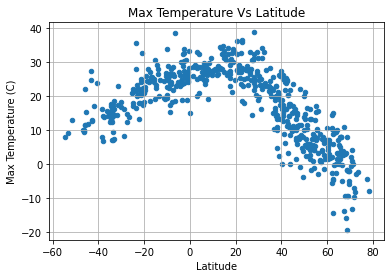

In [8]:
# Set x and y values
city_weather_data.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude', grid=True)
plt.show()

## Latitude vs. Humidity Plot

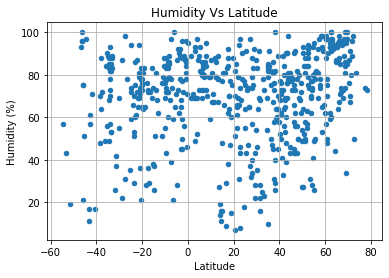

In [9]:
city_weather_data.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude', grid=True)
plt.show()

## Latitude vs. Cloudiness Plot

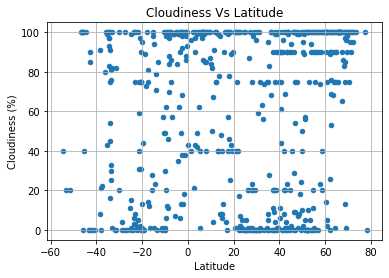

In [10]:
city_weather_data.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude', grid=True)
plt.show()

## Latitude vs. Wind Speed Plot

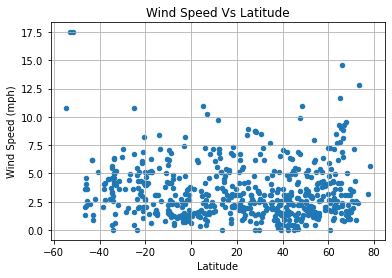

In [11]:
city_weather_data.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (mph)', title='Wind Speed Vs Latitude', grid=True)
plt.show()

## Linear Regression

In [12]:
# split data into northern and southern hemispheres
northern_hem_cities = city_weather_data.loc[(city_weather_data['Lat'] > 0)]
southern_hem_cities = city_weather_data.loc[(city_weather_data['Lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is -0.8600754690858176


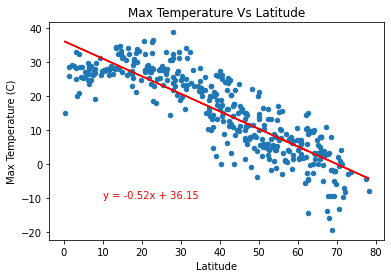

In [13]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Max Temp']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (10,-10), color='r')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.7365449406174481


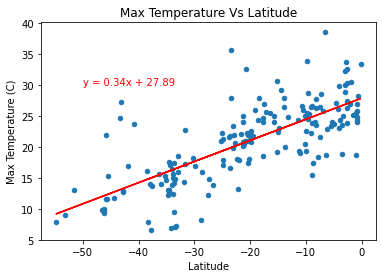

In [14]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Max Temp']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-50,30), color='r')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.2147756581590106


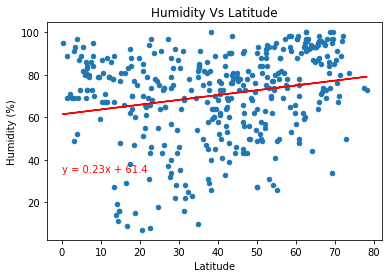

In [15]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Humidity']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (0,34), color='r')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.15995173522314607


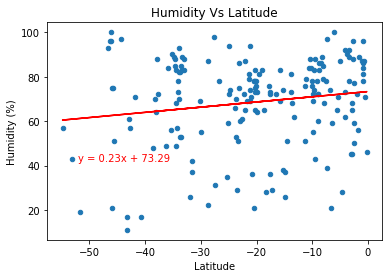

In [16]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Humidity']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-52,42), color='r')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.1350889226484555


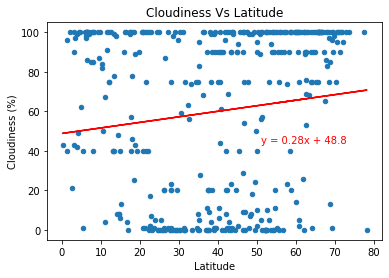

In [19]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Cloudiness']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (51,44), color='r')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.1407239099810272


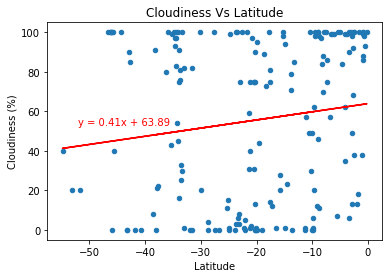

In [20]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Cloudiness']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-52,53), color='r')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.03747179073466126


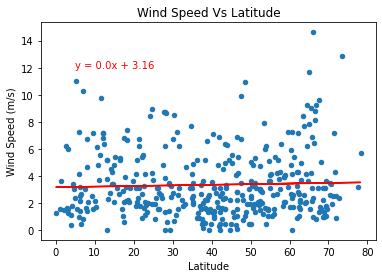

In [21]:
xvalues = northern_hem_cities['Lat']
yvalues = northern_hem_cities['Wind Speed']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
northern_hem_cities.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (m/s)', title='Wind Speed Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (5,12), color='r')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is -0.3179755346113878


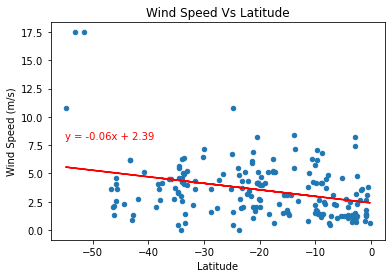

In [22]:
xvalues = southern_hem_cities['Lat']
yvalues = southern_hem_cities['Wind Speed']
slope, intercept, r, p, std_err = linregress(xvalues, yvalues)
fit = slope*xvalues + intercept
fit_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

print(f"The R-value is {r}")
southern_hem_cities.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (m/s)', title='Wind Speed Vs Latitude')
plt.plot(xvalues, fit, "-", color='r')
plt.annotate(fit_eq, (-55,8), color='r')
plt.show()